In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#!pip3 install pysindy
#import pysindy as ps
import scipy.stats as stats
import os
import pandas as pd
import numpy as np
pd.set_option("display.precision", 3)
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
folder_path = str('/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/usgs_modpods_results')

shifted_train = dict()
shifted_eval = dict()
noshift_train = dict()
noshift_eval = dict()
performance_summaries = dict()
for subdir, dirs, files in os.walk(folder_path):
    print(subdir)
    for file in files:
        if("error_metrics" in str(os.path.join(subdir, file))):
          print(str(subdir)[86:86+8])
          site_id = str(subdir)[86:86+8]
          # only look at the linear models
          if ("po_1" in str(os.path.join(subdir, file))):
            if ("training" in str(os.path.join(subdir, file))):
              if ("no_shift" in str(os.path.join(subdir, file))):
                noshift_train[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
              else:
                shifted_train[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
            elif ("eval" in  str(os.path.join(subdir, file))):
              if ("no_shift" in str(os.path.join(subdir, file))):
                noshift_eval[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
              else:
                shifted_eval[site_id] = pd.read_csv(str(os.path.join(subdir, file)))

          #print(str(file))
          #print(str(os.path.join(subdir, file)))
          #site_id = str(file).partition('_')[2][:-33]
          #print(site_id)
          #performance_summaries[site_id] = pd.read_csv(str(os.path.join(subdir, file)))
          #trained_site_ids.append(str(subdir)[-8:])
        #print(os.path.join(subdir, file))
#print(shifted_train['03439000'].NSE.mean())
for site_id in shifted_train:
  print(shifted_train[site_id])

/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/usgs_modpods_results
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/usgs_modpods_results/14299800_po_1_no_shift
14299800
14299800
/content/drive/MyDrive/PhD Admin and Notes/paper1/revisions-code/usgs_modpods_results/14179000_po_1_no_shift
14179000


In [3]:
# grab all the NSE's from each type and make a list
shift_train_NSE = list()
for site_id in shifted_train:
  shift_train_NSE.append(shifted_train[site_id].NSE.max())
shift_eval_NSE = list()
for site_id in shifted_eval:
  shift_eval_NSE.append(shifted_eval[site_id].NSE.max())
noshift_train_NSE = list()

for site_id in noshift_train:
  noshift_train_NSE.append(noshift_train[site_id].NSE.max())
noshift_eval_NSE = list()
for site_id in noshift_eval:
  noshift_eval_NSE.append(noshift_eval[site_id].NSE.max())
print(shift_train_NSE)
print(shift_eval_NSE)
print(noshift_train_NSE)
print(noshift_eval_NSE)


[]
[]
[0.7671244440398813, -2.472440677777401]
[0.7614564204810368]


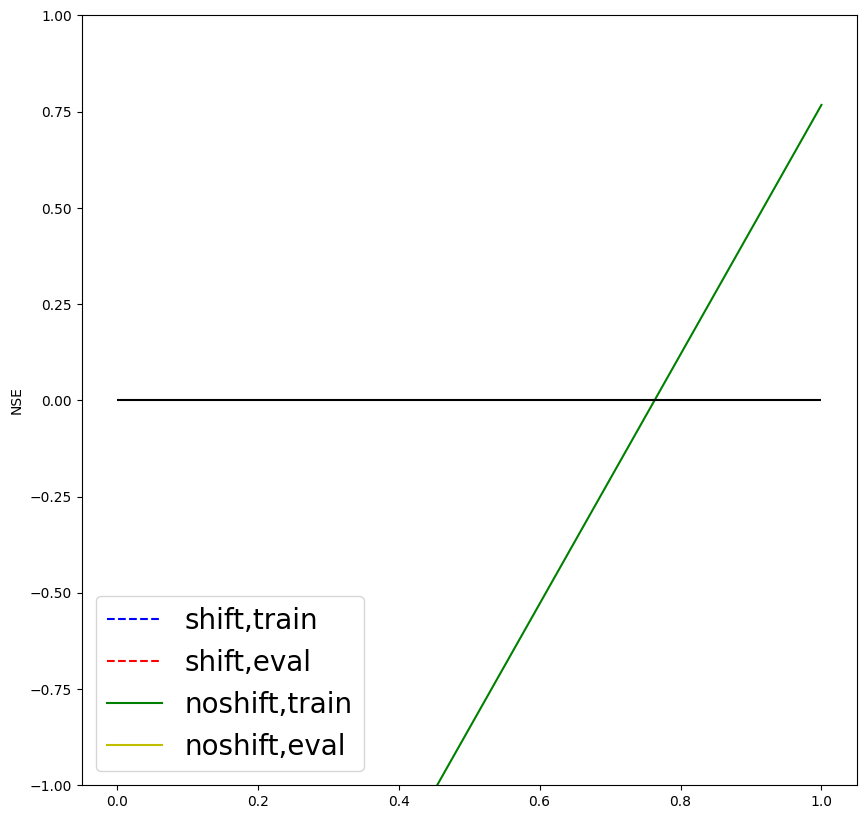

In [4]:
plt.figure(figsize=(10,10))
plt.plot(np.sort(shift_train_NSE),'b--',label='shift,train')
plt.plot(np.sort(shift_eval_NSE),'r--',label='shift,eval')
plt.plot(np.sort(noshift_train_NSE),'g-',label='noshift,train')
plt.plot(np.sort(noshift_eval_NSE),'y-',label='noshift,eval')
plt.ylabel("NSE")
plt.ylim([-1,1])
plt.hlines(0,0,len(noshift_train_NSE)-1,'k')
plt.legend(fontsize=20)